# Exercises
1. Try to build a classifier for the MNIST mnistet

2. Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel add them to the training set, train your best model on this expanded training set.

3. Tackle the Titanic mnistet. A great place to start is on Kaggle. 

4. Build a spam classifier (a more challenging exercise):
    - a. Download examples of spam and ham from Apache Spam Assassin’s public
mnistets.
    - b. Unzip the mnistets and familiarize yourself with the data format.
    - c. Split the data into a training set and a test set.
    - d. Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello”, “how”, “are”, “you”, then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
    You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL”, replace all numbers with
    “NUMBER”, or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).
    - e. Finally, try out several classifiers and see if you can build a great spam classi‐ fier, with both high recall and high precision.


# 1. Build a classifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
samples = mnist.data
targets = mnist.target

In [5]:
X = pd.DataFrame(samples, columns=mnist.feature_names)
y = pd.DataFrame(targets, columns=['target'])

In [6]:
y.value_counts(ascending=True)

target
5         6313
4         6824
8         6825
6         6876
0         6903
9         6958
2         6990
3         7141
7         7293
1         7877
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=len(mnist.target_names))
clf.fit(X_train.iloc[0:100], y_train.iloc[0:100])
y_pred = clf.predict(X_test.iloc[0:30])

print(clf.score(X_test.iloc[0:300], y_test.iloc[0:300]))

0.6966666666666667


/Users/krit/homebrew/Caskroom/miniforge/base/envs/mlp-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [i for i in range(1, 11)], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, param_grid=param_grid)
clf.fit(X, y)

print(clf.score(X_test, y_test))

/Users/krit/homebrew/Caskroom/miniforge/base/envs/mlp-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/krit/homebrew/Caskroom/miniforge/base/envs/mlp-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/krit/homebrew/Caskroom/miniforge/base/envs/mlp-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/krit/homebrew/Caskroom/miniforge/base/envs/mlp-env/lib/python3.10/

KeyboardInterrupt: 

In [ ]:
print(clf.best_estimator_)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
clf.score(X_test, y_test)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score

cros = cross_val_score(clf, X_test, y_test)
cros.mean()

/Users/krit/homebrew/Caskroom/miniforge/base/envs/mlp-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/krit/homebrew/Caskroom/miniforge/base/envs/mlp-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/krit/homebrew/Caskroom/miniforge/base/envs/mlp-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/krit/homebrew/Caskroom/miniforge/base/envs/mlp-env/lib/python3.10/

0.9797892038171201

# 2. Data Augmentation

In [ ]:
# Shift left
data = X.iloc[0].values

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

shifted_image_left = shift_image(data, -5, 0)

In [ ]:
shifted_image_left

array([ 1.00000000e+00,  1.70347264e-16, -5.71508483e-17,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.50000000e+01,  5.00000000e+00,  1.83627207e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.10000000e+01,  8.00000000e+00,  1.78358774e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.00000000e+00,  8.00000000e+00,  1.43074796e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.00000000e+00,  8.00000000e+00,  1.60848112e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.20000000e+01,  7.00000000e+00,  1.90069445e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.20000000e+01, -1.75045907e-16,  1.36915505e-15,  0.00000000e+00,
        0.00000000e+00,  

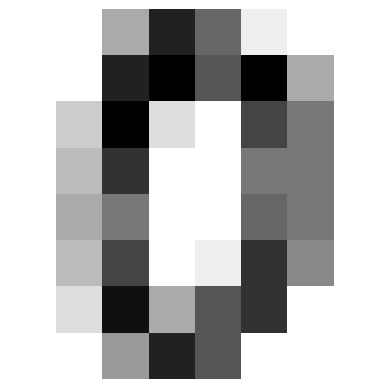

In [ ]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
plot_digit(data)